# <p style="text-align:center;">EN3160 Assignment 1 - Codes</p>
## <p style="text-align:center;">210498T</p>

1 Implement the intensity transformation

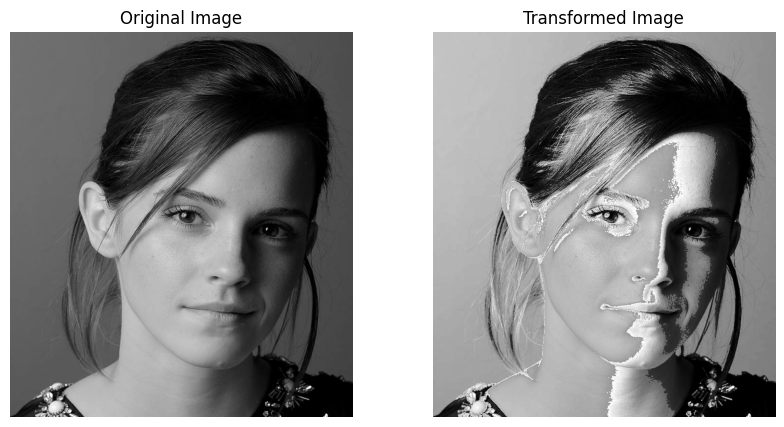

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img_path = 'a1images/emma.jpg'  # Path to the uploaded image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define the intensity transformation based on Fig. 1a
def intensity_transform(pixel_value):
    if pixel_value <= 50:
        return pixel_value
    elif (50<=pixel_value & pixel_value <= 150):
        return 1.55 * pixel_value + 22.5
    elif (150<=pixel_value & pixel_value <=255):
        return pixel_value

# Vectorize the function so it can be applied to all pixels
vectorized_transform = np.vectorize(intensity_transform)

# Apply the intensity transformation to the image
transformed_img = vectorized_transform(img)

# Clip the values to be in the valid range [0, 255] for image pixels
transformed_img = np.clip(transformed_img, 0, 255).astype(np.uint8)

# Display the original and transformed images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50),(50,100),(150,255),(150, 150),(255,255)])

t1 = np.linspace(0, c[0,1], c[0,0]).astype('uint8')
t2 = np.linspace(c[1,1], c[2,1]+1, c[2,0]+1 - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1],c[4,1] + 1, c[4,0]+1 - c[3,0]).astype('uint8')
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

ae = np.arange(256)

img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

257


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\lut.cpp:368: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'cv::LUT'


256


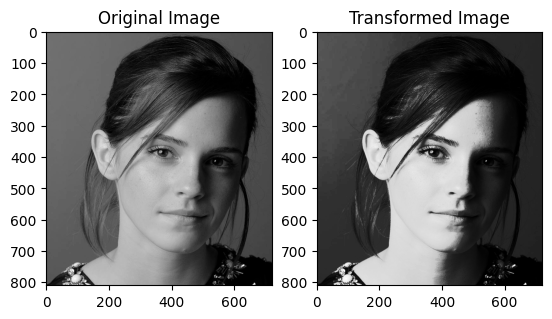

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define control points
c = np.array([(100, 50), (150, 200)])

# Generate the transformation lookup table (LUT)
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')  # from 0 to c[0, 1]
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  # from c[0, 1] to c[1, 1]
t3 = np.linspace(c[1, 1], 255, 255 - c[1, 0] + 1).astype('uint8')  # from c[1, 1] to 255

# Concatenate the segments to create a LUT of size 256
transform = np.concatenate((t1[:-1], t2[:-1], t3), axis=0).astype('uint8')

# Check if the length of transform is exactly 256
print(len(transform))  # Should be 256

# Load the image in grayscale
img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the lookup table (LUT) to the image
if img_orig is not None and len(transform) == 256:
    image_transformed = cv.LUT(img_orig, transform)

    # Display the original and transformed images using matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(img_orig, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image_transformed, cmap='gray')
    plt.title('Transformed Image')
    
    plt.show()
else:
    print("Image not loaded or transform length is incorrect")